# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

### Import libraries

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from aquarel import load_theme
import roughviz

### Load data

In [2]:
df_observations = pd.read_csv('observations.csv')
df_species_info = pd.read_csv('species_info.csv')

### Explore data

In [3]:
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
df_species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
df_species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [7]:
df_observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [8]:
df_species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [9]:
df_observations[df_observations.duplicated()]

,scientific_name,park_name,observations
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
8710,Streptopelia decaocto,Yellowstone National Park,255
10038,Plantago major,Great Smoky Mountains National Park,90
10674,Arctium minus,Yosemite National Park,162
12381,Eleocharis palustris,Great Smoky Mountains National Park,62
13372,Hesperis matronalis,Bryce National Park,124
16741,Prunella vulgaris,Great Smoky Mountains National Park,75
17378,Potentilla norvegica,Yosemite National Park,148
17577,Spilogale putorius,Yellowstone National Park,256
18141,Poa compressa,Great Smoky Mountains National Park,80


In [10]:
df_species_info[df_species_info.duplicated()]

,category,scientific_name,common_names,conservation_status


After looking at both data sets, we can see how the especies info has missing values for the field conservation_status. However, we need more details to determine whether is structurally missing data, missing completely at random (MCAR), missing at random (MAR) or missing not at random (MNAR). 

Let's print more values of the data et. 

In [11]:
df_species_info.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### Handling Missing Data

Looking at the unique values registered in the field conservation_status, we can see the only values registered shows a concern about the specie's status. It is either about to be endangered, already endangered or threatened, or in recovery. This presents us with 2 possible scenarios:

* The missing data is actually not missing data. Those NaN values mean that there is no danger for those species. 
* The missing data means that there is not enough data to determine if the scecies are in danger or not. 

In both cases, there is a logic behind the missing data, which means there is structurally missing data. 

To make it less confusing, I'm going to replace all the NaNs with a new conservation status: "Not in danger / Not enough data"

In [12]:
df_species_info.conservation_status.fillna(value = "Not in danger / Not enough data", inplace = True)
df_species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in danger / Not enough data
1,Mammal,Bos bison,"American Bison, Bison",Not in danger / Not enough data
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not in danger / Not enough data
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not in danger / Not enough data
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not in danger / Not enough data
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Not in danger / Not enough data
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Not in danger / Not enough data
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Not in danger / Not enough data
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Not in danger / Not enough data


In [13]:
df_species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [14]:
df_species_info.conservation_status.unique()

array(['Not in danger / Not enough data', 'Species of Concern',
       'Endangered', 'Threatened', 'In Recovery'], dtype=object)

In [15]:
df_species_info.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

## Analysis

In [16]:
df_species_info.groupby("conservation_status").size()


conservation_status
Endangered                           16
In Recovery                           4
Not in danger / Not enough data    5633
Species of Concern                  161
Threatened                           10
dtype: int64

In [17]:
conservationCategory = df_species_info[df_species_info.conservation_status != "Not in danger / Not enough data"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [21]:

ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                            stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

<Figure size 640x480 with 0 Axes>

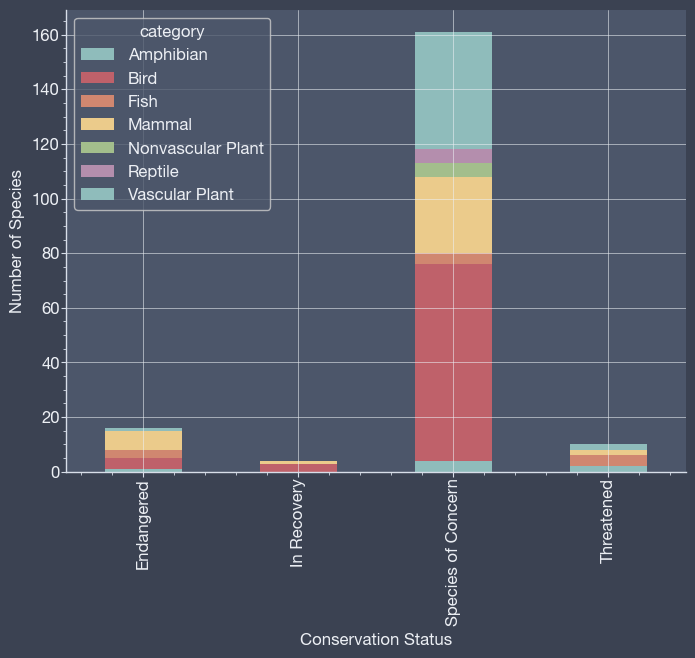

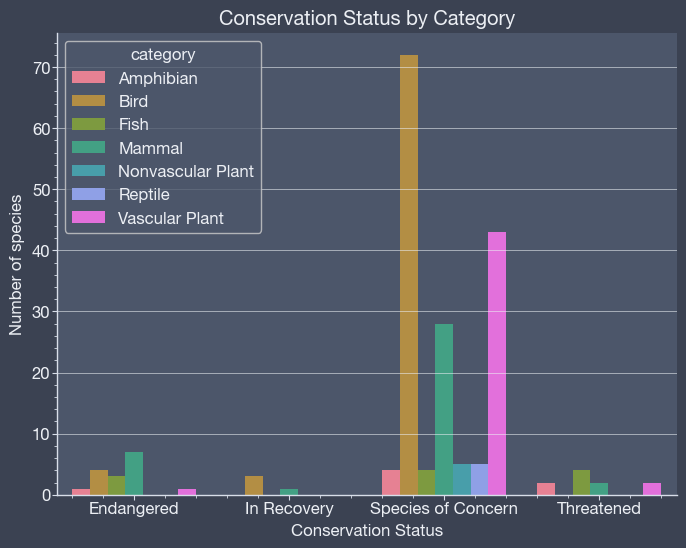

In [22]:
with load_theme("arctic_dark"):

    df_grouped = df_species_info[df_species_info.conservation_status != "Not in danger / Not enough data"].groupby(['conservation_status'])['category'].value_counts().unstack(fill_value=0)

    df_melted = df_grouped.stack().reset_index()
    df_melted.rename(columns={0: 'percentage'}, inplace=True)

    fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figure size if needed

    sns.barplot(data=df_melted, x='conservation_status', y='percentage', hue='category', ax=ax)

    ax.set_xlabel('Conservation Status')
    ax.set_ylabel('Number of species')
    ax.set_title('Conservation Status by Category')

    plt.show()


### Are certain types of species more likely to be endangered?

Looking at the chart above, we can see that Mammals are more endangered than the other species, followed by birds. 

### Are the differences between species and their conservation status significant?

Looking at the charts above, we can see how there are significantly more species we should be concerned about, compared with the number of species endangered, threatened or in recovery. 

### Which species were spotted the most at each park?

In [20]:
import pandas as pd
df1 = pd.DataFrame({'Fruit': ["guava","apple","orange", "mango"], 'A': [4,1,3,2],'B': [5,3,1,1]})
df2 = pd.DataFrame({'Fruit': ["guava","apple","honeydew","orange", "mango"],'E': [4,2,5,1,2],'C': [3,5,2,1,1],
'D': [4,3,5,3,3]})

df = pd.merge(df1, df2)
df = df.set_index('Fruit')
df['mean_rating'] = df.apply(lambda row: row.mean(), axis = 1)
df

,A,B,E,C,D,mean_rating
Fruit,,,,,,
guava,4,5,4,3,4,4.0
apple,1,3,2,5,3,2.8
orange,3,1,1,1,3,1.8
mango,2,1,2,1,3,1.8
